<a href="https://colab.research.google.com/github/Gillmasija/Data-Visualization-pipeline/blob/main/Data_visualization_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Concept
##a. Client Company
* XYZ Company is a large healthcare organization that employs a very diverse workface with different specilizations ie nurses, doctors, adminstrative stuff and support staff.  

##b. Dataset  link
https://www.kaggle.com/datasets/rivalytics/healthcare-workforce-mental-health-dataset

Wilkinson(2025)

## c. Dataset Description  
* The organization has collected data that includes: Stress levels among employees, Burnout Frequency, Job satisfaction scores, Mental health absences,Access to Employee Assistance Programs(EAP) and how they are effective and the Turnover Intention of employees.

  ## d. Need for  a Data Scientist
  * The company is facing high employee turnover and high mental health absences which is negatively affecting the company services like patient care, efficiency and cost.
  * They need a data scientist to answer the following questions:
  1. What are the workplace factors that contribute highly to stress levels among employees?
  2. Which Departments have the highest Turnover risk?
  3. How does burnout Frequency affect Turnover Intention?
  4. Do employees with access to Employee Assistnace Programs(EAPs) have lower burnout?
  5. Which healthcare roles are most affected by stress and burnout?

# Data Collection
##**1. Library Importation**    
* Import the necessary libraries to be used in the data manipulation,analysis and visualization.

In [ ]:
import pandas as pd#for dataset analysis
import matplotlib.pyplot as plt#interface to create plots
import seaborn as sns #advanced statistical visualizations
from sklearn.preprocessing import LabelEncoder #used to convert descriptive data to numerical

## **2. Loading and Reading Dataset**
* Read and load the dataset using pandas library to be applied in the notebook.


In [ ]:
data=pd.read_csv("Healthcare Workforce Mental Health Dataset.csv")

#Data Exploration
* Understanding the structure of the dataset and understanding the features to be preprocessed.

## **1. First Columns**
* Print the first few columns to understand the general overview of the data.

In [ ]:
data.head()

,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,HCP-00001,Pediatric Nurse,Pediatrics,Heavy Workload,8,Often,2,Yes,6,No
1,HCP-00002,Laboratory Technician,Laboratory,Safety Concerns,8,Often,1,Yes,12,No
2,HCP-00003,Nursing Assistant,Assisted Living,Poor Work Environment,6,Occasionally,2,Yes,9,Yes
3,HCP-00004,Medical Assistant,Outpatient Services,Poor Work Environment,7,Never,4,No,11,No
4,HCP-00005,Registered Nurse,General Medicine,Work-Life Imbalance,8,Occasionally,2,Yes,7,No


##**2. Data overview**  
* Understand the general structure of the dataset ie, how many columns and rows, the datatypes of each column.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Employee ID             5000 non-null   object
 1   Employee Type           5000 non-null   object
 2   Department              5000 non-null   object
 3   Workplace Factor        5000 non-null   object
 4   Stress Level            5000 non-null   int64 
 5   Burnout Frequency       5000 non-null   object
 6   Job Satisfaction        5000 non-null   int64 
 7   Access to EAPs          5000 non-null   object
 8   Mental Health Absences  5000 non-null   int64 
 9   Turnover Intention      5000 non-null   object
dtypes: int64(3), object(7)
memory usage: 390.8+ KB


###**Interpretation**  
* The dataset has 5000 entries and 10 columns.  
* 3 columns with Numerical data(Stress Level,Mental Health Absences and Job Satistfaction)
* 7 columns with Descriptive data(Employee ID,Employee Type,Department,Workplace Factor,Burnout Frequency,Acces to EAPs,Turnover Intention


##**3. Check for missing values**  
* Check if our dataset has some unfilled data

In [ ]:
data.isnull().sum()

,0
Employee ID,0
Employee Type,0
Department,0
Workplace Factor,0
Stress Level,0
Burnout Frequency,0
Job Satisfaction,0
Access to EAPs,0
Mental Health Absences,0
Turnover Intention,0


###**Interpretation**  
* The dataset does not have any missing values.

## **4. Check for repetitive columns**
* To avoid data inconsitency, we will check for repetitive columns in the dataset.

In [ ]:
#find the sum of duplicated rows in the dataset
duplicated_rows=data.duplicated().sum()
#print out the number of duplicated rows
print(f"Number of Duplicated rows is:{duplicated_rows}")

Number of Duplicated rows is:0


### **Findings**
* There are no duplicated columns in this dataset

# Data Preprocessing
* Prepare the dataset for analysis


##**1. Label Encoding**  
* The dataset contains some descriptive data which have to be converted into numerical data for ease of analyzation

In [ ]:
#list of all descriptive columns
dc=["Burnout Frequency","Access to EAPs","Turnover Intention"]
#blank dictionary to store the encoders
ld={}
#loop to ensure encoding happens to each descriptive column
for col in dc:
    LE=LabelEncoder() #variable to store the encoder for each column
    data[col]=LE.fit_transform(data[col])#converts the descriptive values to numerical
    ld[col]=LE#save the encoder in the dictionary incase you need to revert back



##**2. Unique values**  
* Identify the key values in the encoded columns.

In [ ]:
print(data["Burnout Frequency"].unique())
print(data["Access to EAPs"].unique())
print(data["Turnover Intention"].unique())

[2 1 0]
[1 0]
[0 1]


##**3. Display a list of all columns**  
* Understand the column names to indetify dependant  and independant **variables**.

In [ ]:
data.columns

Index(['Employee ID', 'Employee Type', 'Department', 'Workplace Factor',
       'Stress Level', 'Burnout Frequency', 'Job Satisfaction',
       'Access to EAPs', 'Mental Health Absences', 'Turnover Intention'],
      dtype='object')

### **Findings**
* **Dependent variables**: Mental Health Absences and Turnover Intention.
* **Independant variables**: Employee ID, Employee Type,Department, Workplace Factor,Stress Level, Burnout Frequency,Job Satisfaction,Access to EAPs

# Explanatory Data Analysis
* Understanding the key features in our dataset and how they relate to each other to answer key business questions.

##**1. What are the workplace factors that contribute highly to stress levels among employees?**


* **Importance:** Understanding the major workplace issues that contribute to high stress levels helps the management prioritize interventions to improve employee well-being.

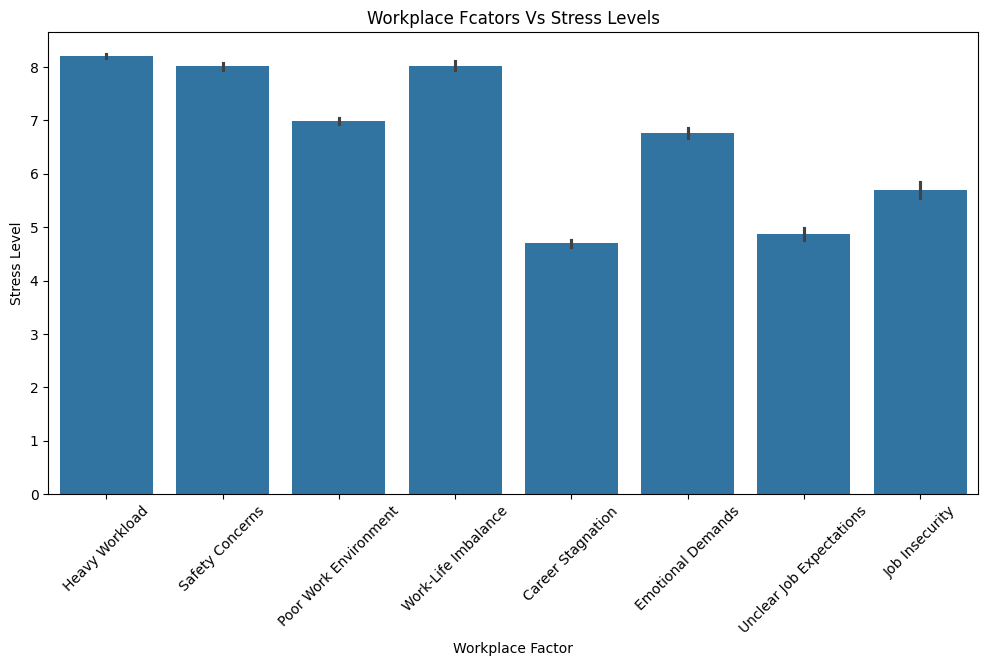

In [ ]:
plt.figure(figsize=(12,6))#height and width of the plot
#plots a graph of workplace factors vs stress levels
sns.barplot(x=data["Workplace Factor"],y=data["Stress Level"])
plt.title("Workplace Fcators Vs Stress Levels")#plot title
plt.xticks(rotation=45)#rotate workplace factors for ease of readability
plt.show()#display the graph

###**Interpretation**  
* The major workplace factors that causes high stress levels among employees are Work-Life Imbalance,Safety Concerns and Heavy Workload as they have the longest bars in the graph.

##**2.Which Departments have the highest Turnover risk?**   
 * **Importance:** Evaluate which departments whose workers have the highest chances of leaving to allow the HR to focus retention efforts on high risk departments.

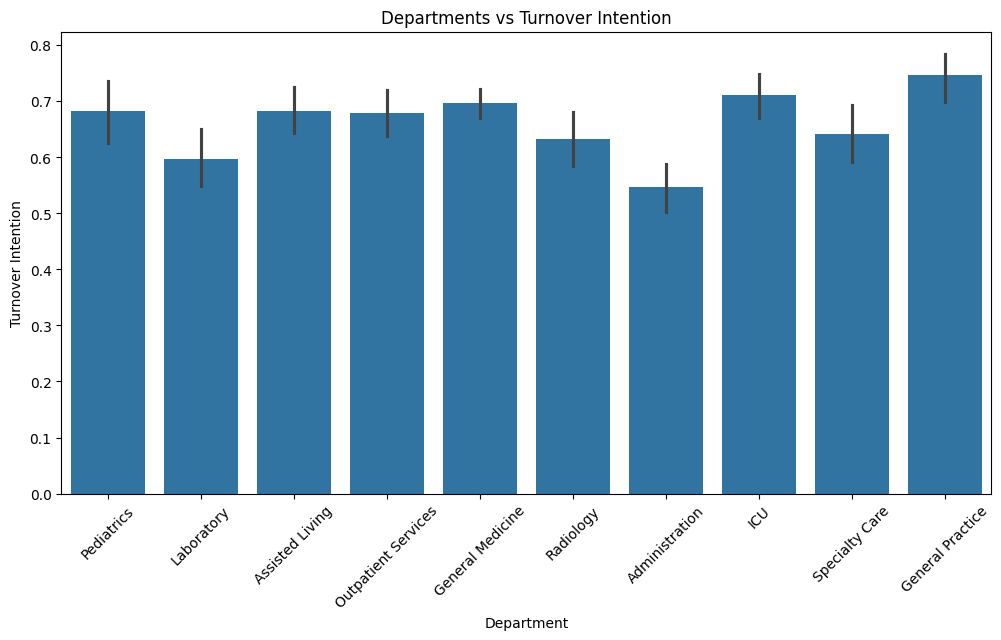

In [ ]:
plt.figure(figsize=(12,6))#height and width
#bar graph of department vs turnover intention
sns.barplot(x=data["Department"],y=data["Turnover Intention"])
#plot title
plt.title("Departments vs Turnover Intention")
#rotate the values on the x-axis for ease of redability
plt.xticks(rotation=45)
#display the graph
plt.show()


###**Interpretation**  
* General Practice,ICU,General Medicine,Outpatient Services,Assisted Living and Pediatrics are the high risk departments as the contain the longest bars.

##**3.How does burnout Frequency affect Turnover Intention?**  
* **Importance:** Understanding the relationship between burnout frequency among employees and their turnover intention will provide insights for the organization on how they can reduce turnover by managing burnout effectively.

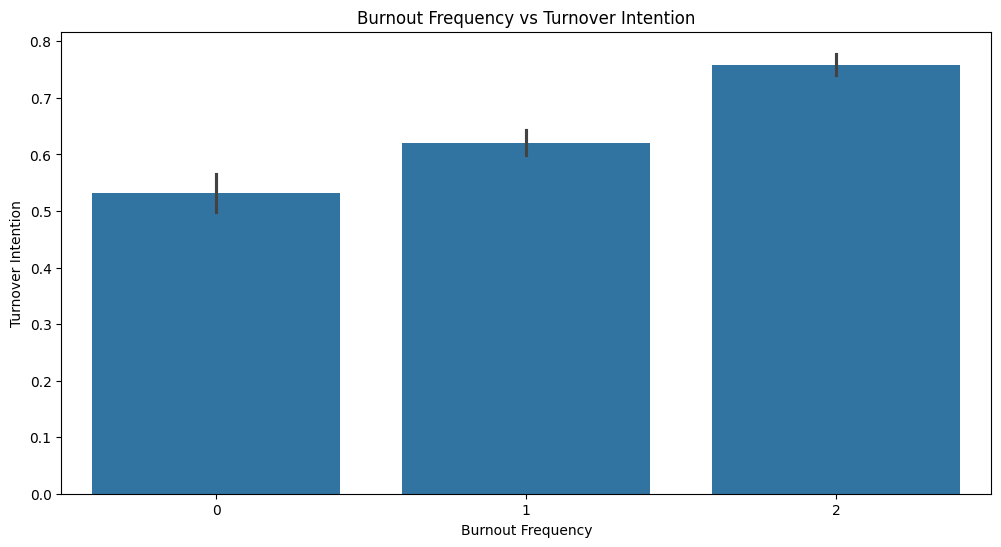

In [ ]:
plt.figure(figsize=(12,6))#sets the height and width of the plot
#graph of burnout frequncy vs turnover intention
sns.barplot(x=data["Burnout Frequency"],y=data["Turnover Intention"])
#graph title
plt.title("Burnout Frequency vs Turnover Intention")
#display graph
plt.show()

###**Interpretation**
* Employees with the highest burnout frequency of 2 tend to have a higher turnover intention as it has the longest bar.

## **4.Do employees with access to Employee Assistnace Programs(EAPs) have lower burnout?**  
* **Importance:** Understanding the effectives of Employee Assistance program will help the organization determine whether the program should be expanded or not.

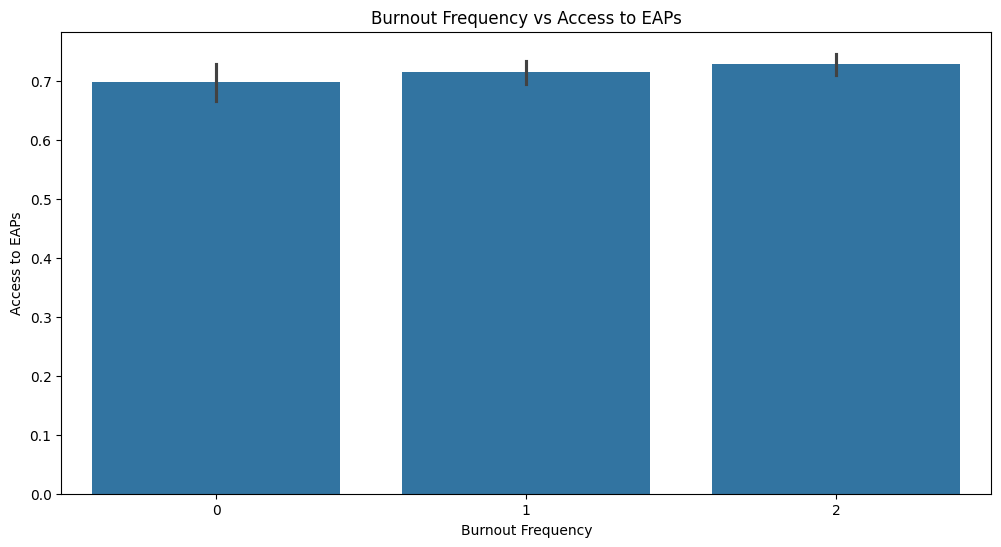

In [ ]:
plt.figure(figsize=(12,6))#set the height and width
#plot a graph of access to EAPs vs burnout frequency
sns.barplot(x=data["Burnout Frequency"],y=data["Access to EAPs"])
#title of the plot
plt.title("Burnout Frequency vs Access to EAPs")
#Display the graph
plt.show()

###**Interpretation**  
* All bars are equal hence access to EAPs does not have a large effect to burnout frequency among employees.

## **5.Which healthcare roles are most affected by stress and burnout?**  
* **Importance:** Some roles maybe more stressful than others hence the organization needs to understand which roles are more stressful so as to initiate targeted initiatives to deal with stress levels among their employees.

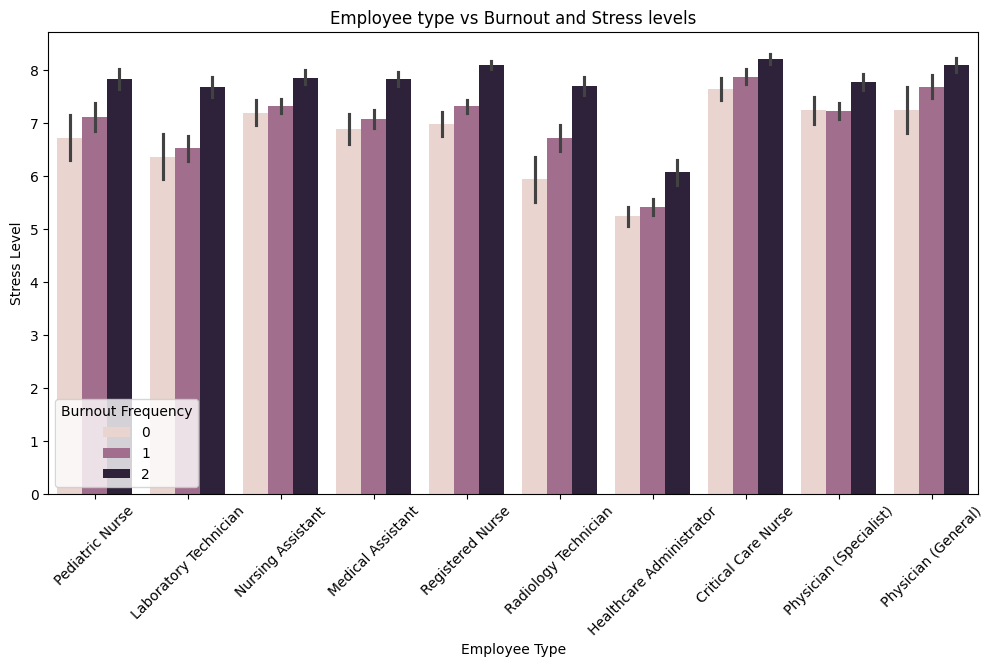

In [ ]:
plt.figure(figsize=(12,6))#sets the height and the width
#plots a graph of employee type vs Stress level with different bars showing the burnout frequency of each employee type
sns.barplot(x=data["Employee Type"],y=data["Stress Level"],hue=data["Burnout Frequency"])
#rotate the x axis labels as they are not readbable
plt.xticks(rotation=45)
#title for the plot
plt.title("Employee type vs Burnout and Stress levels")
#display graph
plt.show()

###**Interpretation:**   
* Critical Care Nurse,general physician,registered nurse,Laboratory technician,pediatric nurse,nursing and medical assistant are the health roles that display the most burnout frequencies and stress levels among different job roles.

# Final Discussion
## **1.Strengths of the analysis:**  
1. Pointed out the key factors that lead to high stress levels among employees leading to high turnover rates.
2. Analyzed the impact of burnout frequency among different job roles.
3. Evalauated the effectives of Employee assistance programs
4. Provided key interpretations of data to enhance workforce well being.

##**2.Limitations of the analysis**  
1. The dataset did not include external factors that affect the well being of the employees ie; salary
2. The dataset did not include time data hence difficult to monitor healthcare trend levels among employees during different seasons.

##**3. Business Implications**
1. High stress levels affect the perfomance of employees leading to low productivity and decrease in quality of service.
2. Poor well being of employees will lead to high turnover rates in turn decreasing the optimization of resources.
3. Departments with high turnover rates will lead to low productivity.


## **4. Recommendations**
1. Improve workplace factors contributing to high stress levels among employees ie;workload management
2. Enhance Employee Assistance Programs to improve the general well being of employees
3. Focus on high risk departments with high turnover intention
4. Come up with targeted mental health interventions for roles expriencing high burnout

# Reference
Wilkinson, R. (2025) *Healthcare Workforce Mental Health Dataset* [Data set]. Kaggle. Available at: https://doi.org/10.34740/KAGGLE/DSV/10768196.